### Introduction
The housing crisis is becoming an increasingly urgent issue across many countries,
especially in urban areas. It is clear that house prices have been growing significantly more than a decade ago. Throughout history, the house prices have never seen as much growth as the 20’th century (Knoll, K., Schularick, M., & Steger, T., 2017). While home prices have surged over the last decade, average
incomes have not been able to keep growing at the same pace, making housing
progressively more unaffordable for large portions of the population. This data visualization
will explore how the gap between home prices and income has progressed over time and
across regions and within the netherlands, aiming to explore patterns and consequences of this
imbalance.

**First perspective: unaffordable for first-time buyers**

Recently, housing has become increasingly unaffordable for first-time buyers. 
Home prices have risen much faster than
average wages, which undermines first-time buyers. The substantial growth in housing prices combined with the tight house market forms a harsh reality for first-time buyers (E.M.J. Veerhoek. 2024) This affordability gap forces many to
delay homeownership or go into increasingly higher loans. There are also things such as
the need for larger down payments, rising rents, and stricter lending standards that limit
homeownership. 

In this perspective, we will be comparing the growth of house prices against income. we will also show the trouble first time buyers go through, by showing how much starters have to pay relative to their income. Besides that, we will also highlight de difference between provinces. 

**Second perspective: Contextualizing affordability through changing conditions**

While
housing may seem unaffordable at first glance, there might be more economic and social
changes at play. Interest rates are currently at an all-time low, which can compensate for
the high prices by lowering the monthly mortgage costs. There are also government
subsidies, changing living preferences and a growth in alternative living arrangements that
offer paths to affordability in housing. Location also plays a key role in pricing: while urban
centers might be expensive, there are also many areas that still offer relatively affordable
housing options. Alternative housing such as tiny houses might also be the new future of housing (Shearer, H., & Burton, P. 2018), proving to be a sustainable and affordable alternative.  

In this perspective, we will be comparing house values to monthly costs at a fixed interest rate. We will also look at the upcoming of alternative housing options, to show cheaper alternatives in the current market. Then we will show the difference of house prices between regions, to underline the fact that moving to different parts of the county might lessen the financial pressure of entering and sustaining in the current house market. 

### Dataset and preprocessing

To make the datasets more easily usable for this infovisual, the datasets needed to be streamlined. This was done by removing any data with unneeded information and keeping only the specific information that was needed to make the correct visualization. This was to make it easier to make the code and that there was no hardcoding needed, because the datasets were easily readable by modules like plotly.

The structure of the used datasets does not differ much. Most datasets are made up of a few important parts. Firstly, every dataset has a date, to make sure we can document every change over time. Secondly, almost all the datasets have been divided into different provinces and/or cities. The third variable will differ between datasets. This variable is what distinguishes the dataset from each other. The focus for the datasets is to be relevant in current time, so most of the data will be post 2010’s. Most columns in the datasets are also renamed and translated, since they were provided in dutch. It is also possible for some columns that were not of use to be removed. 

### 📈 Argument 1.1: Housing Prices vs. Income (2011–2023)

This dual-axis line chart visualizes the divergence between average home prices and standardized disposable income in the Netherlands from 2011 to 2023. 

- The **left Y-axis** shows average home prices in euros.
- The **right Y-axis** shows standardized disposable income in euros.
- Both variables are plotted over the years 2011–2023.

While income has increased gradually over the years, **home prices have risen much more sharply**. The visualization highlights the growing affordability gap for first-time buyers, showing that income growth has **not kept pace** with the rapid rise in housing costs.

This supports the argument that housing has become increasingly unaffordable for starters.


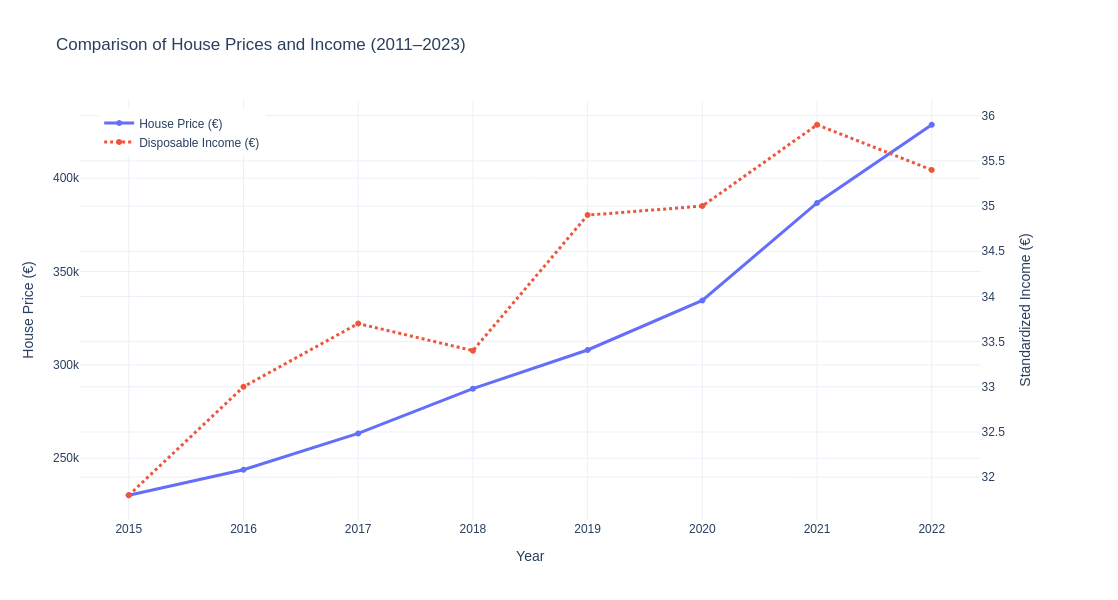

In [7]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

bruto_df = pd.read_csv('gemmideld_bruto_inkomen.csv', delimiter=',')
besteedbaar_df = pd.read_csv('gemmideld_inkomen.csv', delimiter=',')
huisprijs_df = pd.read_csv('huisprijs.csv', delimiter=',')

bruto_df.columns = bruto_df.columns.str.strip()
besteedbaar_df.columns = besteedbaar_df.columns.str.strip()
huisprijs_df.columns = huisprijs_df.columns.str.strip()

def clean_income_data(df, year_col, value_col):
    df = df[[year_col, value_col]].copy()
    df[year_col] = df[year_col].astype(str).str.extract(r'(\d{4})').astype(float)
    df[value_col] = df[value_col].astype(str).str.replace(',', '.').astype(float)
    return df[(df[year_col] >= 2011) & (df[year_col] <= 2023)].reset_index(drop=True)

bruto_clean = clean_income_data(bruto_df, 'Category', 'Gemiddeld bruto inkomen')
besteedbaar_clean = clean_income_data(besteedbaar_df, 'Category', 'Gestandaardiseerd besteedbaar inkomen')
bruto_clean.columns = ['Year', 'Gross Income']
besteedbaar_clean.columns = ['Year', 'Disposable Income']

huisprijs_df = huisprijs_df[huisprijs_df['Perioden'].astype(str).str.match(r'^\d{4}$')]
huisprijs_df['Perioden'] = huisprijs_df['Perioden'].astype(int)
huisprijs_df['Gemiddelde verkoopprijs (euro)'] = huisprijs_df['Gemiddelde verkoopprijs (euro)']\
    .astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
huisprijs_clean = huisprijs_df[(huisprijs_df['Perioden'] >= 2011) & (huisprijs_df['Perioden'] <= 2023)][
    ['Perioden', 'Gemiddelde verkoopprijs (euro)']].reset_index(drop=True)
huisprijs_clean.columns = ['Year', 'House Price']

merged_df = pd.merge(huisprijs_clean, bruto_clean, on='Year', how='inner')
merged_df = pd.merge(merged_df, besteedbaar_clean, on='Year', how='inner')

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(
    x=merged_df['Year'],
    y=merged_df['House Price'],
    mode='lines+markers',
    name='House Price (€)',
    line=dict(width=3)
), secondary_y=False)
fig.add_trace(go.Scatter(
    x=merged_df['Year'],
    y=merged_df['Disposable Income'],
    mode='lines+markers',
    name='Disposable Income (€)',
    line=dict(dash='dot', width=3)
), secondary_y=True)

fig.update_layout(
    title="Comparison of House Prices and Income (2011–2023)",
    xaxis_title="Year",
    legend=dict(x=0.02, y=0.98),
    template="plotly_white",
    height=600
)
fig.update_yaxes(title_text="House Price (€)", secondary_y=False)
fig.update_yaxes(title_text="Standardized Income (€)", secondary_y=True)

fig.show()


### 📊 Argument 1.2: First-time buyers have relatively higher mortgage debt

This 3D visualization shows the relationship between gross income, age and the Loan-to-Income (LTI) ratio of households in the Netherlands (CBS, 2022).

- **X-axis**: Gross income (€) per age group (estimated or based on CBS/Knab data)
- **Y-axis**: Age of the main breadwinner (average per group)
- **Z-axis**: Loan-to-Income (LTI): the ratio between mortgage debt and gross income

**Observations:**
- Younger age groups (25–35 years) have a lower income, but a relatively high LTI.
- Older age groups (45–65 years) have a higher income, but lower LTI ratios.
- This highlights that first-time buyers are spending a larger portion of their income on mortgage payments — an indication of reduced affordability.

The color coding by age group helps visually distinguish trends.

In [8]:
import pandas as pd
import plotly.express as px

# CSV's inladen
lti_df = pd.read_csv('LTI_per_Leeftijdsgroep.csv')
inkomen_df = pd.read_csv('inkomen_huishoudens_per_leeftijd.csv')

inkomen_df.columns = inkomen_df.columns.str.strip()
inkomen_clean = inkomen_df[['Overige kenmerken', 'Bruto-inkomen (1 000 euro)']].copy()
inkomen_clean.columns = ['Leeftijdsgroep', 'Bruto Inkomen']
inkomen_clean['Bruto Inkomen'] = inkomen_clean['Bruto Inkomen'] * 1000

def map_to_lti_group(label):
    if 'tot 25' in label:
        return 'Hoofdkostwinner: tot 25 jaar'
    elif '25 tot 30' in label or '30 tot 35' in label:
        return 'Hoofdkostwinner: 25 tot 35 jaar'
    elif '35 tot 40' in label or '40 tot 45' in label:
        return 'Hoofdkostwinner: 35 tot 45 jaar'
    elif '45 tot' in label or '50 tot' in label or '60 tot' in label:
        return 'Hoofdkostwinner: 45 tot 65 jaar'
    elif '65 jaar of ouder' in label:
        return 'Hoofdkostwinner: 65 jaar of ouder'
    return None

inkomen_clean['LTI Leeftijdsgroep'] = inkomen_clean['Leeftijdsgroep'].apply(map_to_lti_group)
inkomen_grouped = inkomen_clean.groupby('LTI Leeftijdsgroep', as_index=False)['Bruto Inkomen'].mean()

lti_df.columns = lti_df.columns.str.strip()
lti_merged = pd.merge(lti_df, inkomen_grouped, left_on='Leeftijdsgroep', right_on='LTI Leeftijdsgroep', how='inner')

def extract_midpoint(label):
    if 'tot 25' in label:
        return 22
    elif '25 tot 35' in label:
        return 30
    elif '35 tot 45' in label:
        return 40
    elif '45 tot 65' in label:
        return 55
    elif '65 jaar of ouder' in label:
        return 70

lti_merged['Leeftijd'] = lti_merged['Leeftijdsgroep'].apply(extract_midpoint)
lti_merged['Hypotheekschuld (€)'] = lti_merged['Bruto Inkomen'] * lti_merged['LTI']

fig = px.scatter(
    lti_merged,
    x='Bruto Inkomen',
    y='LTI',
    size='Hypotheekschuld (€)',
    color='Leeftijdsgroep',
    hover_name='Leeftijdsgroep',
    text='Leeftijdsgroep',
    size_max=80,
    title='Bubble Chart: Bruto Inkomen vs. LTI per Leeftijdsgroep'
)

fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Bruto Inkomen (€)',
    yaxis_title='Loan-to-Income (LTI)',
    height=700,
    width=1000,
    template='plotly_white'
)

fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'inkomen_huishoudens_per_leeftijd.csv'

### 📊 Argument 1.3: In specific provinces, the gap between income and house price widens quicker than in others.
This plot shows the growth of house prices compared to the growth of income per region. Different regions are displayed in different colors, showing not only the difference between income and house prices, but also the difference between regions. This shows that the house market might be worse depending on the region you live in.

**Top Map (House Price-to-Income Ratio by Region):**
- **Color coding**: The map uses a gradient from green to red to indicate the ratio of average house prices to average incomes per region.

**Bottom Line Graph (House Price vs. Income Growth in Noord-Holland):**
- **X-axis:** Year (2011 to 2023)
- **Y-axis:** Percentage growth compared to 2011

From 2011 to 2023, house prices most provinces grew significantly faster than incomes, widening even more from 2017. Central regions seem to suffer more from the growing house prices compared to southern and northern regions, suggesting reduced housing affordabillity. This imbalance has far-reaching consequences. It affects people’s ability to buy a home near their work, pushes younger generations to move away from their hometowns, and deepens the divide between economically stronger and weaker areas. Monitoring and addressing this widening gap is of importance for creating a more balanced housing market across the country.

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import json
from ipywidgets import VBox
woningprijzen = pd.read_csv('gemkoopsom.csv')
inkomens = pd.read_csv('geminkomen.csv')
inkomens = inkomens.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)

woningprijzen['Provincie'] = woningprijzen["Regio's"].str.replace(' (PV)', '', regex=False)
inkomens['Provincie'] = inkomens["Regio's"].str.replace(' (PV)', '', regex=False)

with open('the-netherlands.geojson') as f:
    nl_geojson = json.load(f)

def calculate_growth(df, start_year, end_year):
    df = df.copy()
    df['Growth (%)'] = ((df[str(end_year)] - df[str(start_year)]) / df[str(start_year)]) * 100
    return df[['Regio\'s', 'Growth (%)']]

woning_groei = calculate_growth(woningprijzen, 2011, 2023)
inkomen_groei = calculate_growth(inkomens, 2011, 2023)

merged_data = pd.merge(
    woning_groei.rename(columns={'Growth (%)': 'House_price_growth'}),
    inkomen_groei.rename(columns={'Growth (%)': 'Income_growth'}),
    on='Regio\'s'
)
merged_data['Provincie'] = merged_data['Regio\'s'].str.replace(' (PV)', '', regex=False)
merged_data['Ratio'] = merged_data['House_price_growth'] / merged_data['Income_growth']

line_fig = go.FigureWidget()
line_fig.update_layout(
    title="Click on a province to see details",
    xaxis_title="Year",
    yaxis_title="Euro",
    template="plotly_white",
    width=1200,
    height=500
)

choropleth = go.FigureWidget(
    px.choropleth(
        merged_data,
        geojson=nl_geojson,
        locations='Provincie',
        featureidkey='properties.name',
        color='Ratio',
        hover_name='Provincie',
        hover_data={
            'House_price_growth': ':.1f%',
            'Income_growth': ':.1f%',
            'Ratio': ':.2f',
            'Provincie': False
        },
        color_continuous_scale='RdYlGn_r',
        range_color=(1, 2),
        labels={'Ratio': 'Ratio<br>(House Price/Income)'},
        height=600,
        width=1300
    )
)


choropleth.update_geos(fitbounds="locations", visible=False)
choropleth.update_layout(margin={"r":0,"t":30,"l":0,"b":0}, title="House Price Growth vs. Income Growth Ratio")

def update_line(trace, points, selector):
    if points.point_inds:
        provincie = merged_data.iloc[points.point_inds[0]]['Provincie']
        jaren = [str(y) for y in range(2011, 2024)]

        prijzen = woningprijzen[woningprijzen['Provincie'] == provincie][jaren].values.flatten()
        inkomens_ = inkomens[inkomens['Provincie'] == provincie][jaren].values.flatten()

        prijzen_groei = ((prijzen - prijzen[0]) / prijzen[0]) * 100
        inkomens_groei = ((inkomens_ - inkomens_[0]) / inkomens_[0]) * 100

        line_fig.data = []
        line_fig.add_trace(go.Scatter(x=jaren, y=prijzen_groei, mode='lines+markers', name='House price growth (%)'))
        line_fig.add_trace(go.Scatter(x=jaren, y=inkomens_groei, mode='lines+markers', name='Income growth (%)'))

        line_fig.update_layout(
            title=f'Percentage growth of house prices and income in {provincie} (compared to 2011)',
            yaxis_title='Growth compared to 2011 (%)',
            xaxis_title='Year',
            yaxis=dict(range=[-20, 110]),
            template='plotly_white',
            width=1200,
            height=500
)

choropleth.data[0].on_click(update_line)

VBox([choropleth, line_fig])

/tmp/ipykernel_4909/2660488042.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



ImportError: Please install anywidget to use the FigureWidget class

### Summary of the first perspective

As shown in the arguments, it is made clear that income does not yet match the growth of house prices in any way. While the growth of income in recent year has been growing gradually, it is clear that the house prices have been growing way more sharply the recent years. Besides the average income already not matching the house prices, it is also made clear that starters have a relatively harder time entering the house market, since they have to spend a larger portion of their income on mortgage payments. The ratio between house price and income per region also differs a lot, which has even more negative effects such as a stronger division between economically weak and strong regions.  

### 📊 Argument 2.1: Low Interest Rates Softened the Impact of Rising House Prices
This graph offers important context that challenges overly negative views of the housing market. It shows the monthly mortgage payments for home loans issued at each point in time, calculated using the average home price and the corresponding interest rate for different fixed-rate mortgages. 

- **X-axis:** Date (from 2017 to 2025)
- **Left Y-axis (gray line):** Average house value (€)
- **Right Y-axis (blue line):** Corresponding monthly mortgage costs (€) for a fixed interest rate (5–10 years)

This figure underscores a broader point: the housing market's apparent unaffordability is not just about prices. It also depends on financial conditions, policy choices, and product types—like the mortgage structure. In many cases, households were still able to buy homes thanks to favorable financing terms. So while recent cost increases are certainly real, they follow an extended period of relatively affordable borrowing—suggesting the market may not be as dysfunctional as headlines imply.

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

import warnings
warnings.filterwarnings(
    'ignore',
    message='Could not infer format, so each element will be parsed individually*'
)

df_rente['Datum'] = pd.to_datetime(df_rente['Datum'], errors='coerce')

# ---------------- inlezen ----------------
df_woning = pd.read_csv('schoon_woningdata.csv', parse_dates=['Datum'])
df_rente  = pd.read_csv('(16-06-25)_Bancaire_rente_op_zuiver_nieuw_afgesloten_woninghypotheken_huishoudens.csv')

# kolommen hernoemen – let op: linker-kant is 1-op-1 de lijst die je net printte
df_rente = df_rente.rename(columns={
    'Unnamed: 0':                'Datum',
    'Variabel en <= 1 years':    'Variabel <=1j (%)',
    '> 1 years en <= 5 years':   '1-5j (%)',
    '> 5 years en <= 10 years':  '5-10j (%)',
    '> 10 years':                '>10j (%)'
})

# datum & komma-decimalen opruimen
rentecols = ['Variabel <=1j (%)','1-5j (%)','5-10j (%)','>10j (%)']
df_rente['Datum'] = pd.to_datetime(df_rente['Datum'], errors='coerce')
for c in rentecols:
    df_rente[c] = (
        df_rente[c].astype(str).str.replace(',', '.', regex=False).astype(float)
    )

df_woning['Datum'] = pd.to_datetime(df_woning['Datum'], errors='coerce')
df        = (pd.merge(df_woning, df_rente, on='Datum', how='inner')
              .sort_values('Datum'))

# ---------------- plotfunctie ----------------
def plot_met_rente(rente_col):
    looptijd = 30 * 12                                  # 30 jaar, in maanden
    maandlast = (
        df['Waarde'] * (df[rente_col]/100/12) /
        (1 - (1 + df[rente_col]/100/12) ** -looptijd)
    )

    fig, ax1 = plt.subplots(figsize=(11,6))
    ax1.plot(df['Datum'], df['Waarde'], color='gray', lw=2, label='Woningwaarde')
    ax1.set_ylabel('Woningwaarde (€)', color='gray'); ax1.tick_params(axis='y', labelcolor='gray')
    ax1.set_ylim(bottom=0)

    ax2 = ax1.twinx()
    ax2.plot(df['Datum'], maandlast, color='tab:blue', lw=2, label='Maandlast')
    ax2.set_ylabel('Maandlast (€)',  color='tab:blue'); ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_ylim(bottom=0)
    ax1.set_xlabel('Datum')
    plt.title(f'Woningwaarde vs. maandlast – rentevast: {rente_col}')
    plt.grid(True); fig.tight_layout(); plt.show()

# ---------------- interactieve widget ----------------
interact(
    plot_met_rente,
    rente_col=Dropdown(
        options=rentecols,
        value='5-10j (%)',
        description='Rentevastperiode:'
    )
)


C:\Users\Mark\AppData\Local\Temp\ipykernel_13116\3993582333.py:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



interactive(children=(Dropdown(description='Rentevastperiode:', index=2, options=('Variabel <=1j (%)', '1-5j (…

<function __main__.plot_met_rente(rente_col)>

In [9]:
df_rente = pd.read_csv(
    '(16-06-25)_Bancaire_rente_op_zuiver_nieuw_afgesloten_woninghypotheken_huishoudens.csv'
)
print(df_rente.columns.tolist())

['Unnamed: 0', 'Totaal', 'Variabel en <= 1 years', '> 1 years en <= 5 years', '> 5 years en <= 10 years', '> 10 years']


### 📊 Argument 2.2: Alternative housing options provide local relief
As noted earlier, there might also be a rise of alternative housing options. This could, for example, be tiny houses or other non-usual housing options. We might be in the early stages of a exponential growth of these alternative housing options, as shown in the chart below. These houses are classified as “unknow singe family home”.  

**Years Displayed:** 2021, 2022, 2023, 2024

**Observations:**
- The ‘Unknown single-family home’ category, while still representing a very small portion of the housing market (less than 0.1%), shows the most pronounced relative growth over the period:
   - From 0.051% in 2021 to 0.0726% in 2024 — an increase of over 40% in relative share.
- In contrast, the shares of other housing types remained virtually unchanged over the same period:
   - Terraced houses held steady at ~46%.
   - Detached, corner, and semi-detached houses maintained consistent distributions (~20.3%, ~19.9%, and ~13.7%, respectively).

This figure highlights a subtle but meaningful shift in housing data classification. While the market’s structural composition appears stable, the growth in the “Unknown single-family home” category may signal Or the emergence of new or hybrid housing forms not easily tracked in existing models. Even small changes like this can reflect underlying shifts in how housing is developed, reported, or lived in—reminding us that evolving data categories can be early indicators of broader market.

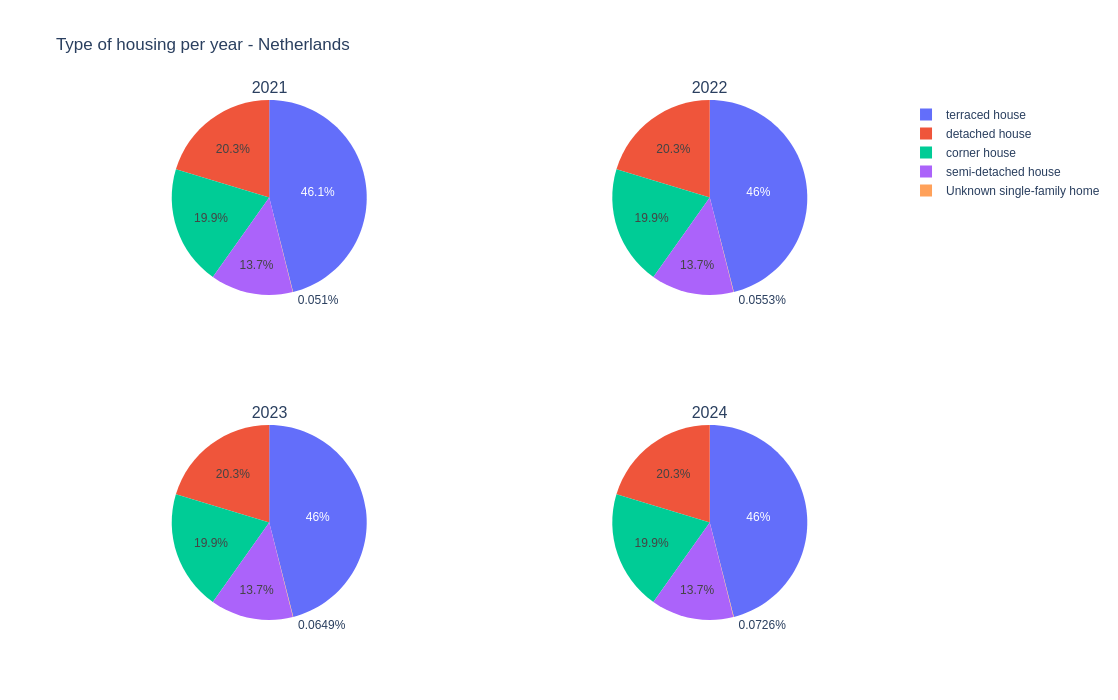

In [10]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("Woningtype__regio_17062025_001601.csv", delimiter=';')
df.columns = df.columns.str.replace('"', '').str.strip()

selected_types = [
    "Unknown single-family home",
    "detached house",
    "semi-detached house",
    "corner house",
    "terraced house",
]
df = df[df["Woningtype"].isin(selected_types)]

region = "Nederland"
df_region = df[df["Regio's"] == region]

unique_periods = sorted(df_region["Perioden"].unique())[-4:]

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}],
           [{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[f"{year}" for year in unique_periods]
)

positions = [(1, 1), (1, 2), (2, 1), (2, 2)]
for i, period in enumerate(unique_periods):
    row, col = positions[i]
    df_year = df_region[df_region["Perioden"] == period]
    grouped = df_year.groupby("Woningtype")["Beginstand woningvoorraad (aantal)"].sum()

    fig.add_trace(
        go.Pie(labels=grouped.index, values=grouped.values, name=str(period)),
        row=row, col=col
    )

fig.update_layout(
    title_text=f"Type of housing per year - Netherlands",
    height=700,
    showlegend=True
)

fig.show()




### 📊 Argument 2.3: Regional Price Differences Make Homeownership More Realistic
As noted in the introduction, housing prices might also depend on location. The following graph will display the difference in house prices between different regions, emphasising the importance of looking at different regions.

- **X-axis:** Dutch regions/municipalities
- **Y-axis (left):** Average home purchase price (€)

**Year Shown:** 2013 - 2024 (interactive)

**Observations:**
- Haarlem stands out as the most expensive region in 2024, with an average purchase price exceeding €550,000.
- Utrecht, ’s-Hertogenbosch, and ’s-Gravenhage (The Hague) also show elevated prices—ranging between €450,000–€525,000 in 2024, reflecting strong demand and urban density.
- At the lower end, Leeuwarden has the most affordable housing in every year, well below the national urban average.
- The gap between the highest and lowest regions exceeds €240,000 in 2024, underscoring the influence of local market pressures, population density, and regional amenities on home prices.

The chart clearly shows that there is almost always a better alternative. Living in the more populated citys might seem more attractive at first, but too few people manage to look at the bigger picture this chart shows. Housing might just need to be sought after at different locations, instead of staying at one part of the country. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

df = pd.read_csv("house_prices.csv", sep=';')

df.columns = ['Periods', 'Regions', 'Average purchase price (euro)']

df['Regions'] = df['Regions'].astype(str).str.replace('"', '').str.strip()
df['Average purchase price (euro)'] = (
    df['Average purchase price (euro)']
    .astype(str)
    .str.replace('"', '')
    .str.replace(' ', '')
)
df['Average purchase price (euro)'] = pd.to_numeric(df['Average purchase price (euro)'], errors='coerce')
df = df.dropna(subset=['Average purchase price (euro)'])
df['Periods'] = pd.to_numeric(df['Periods'], errors='coerce').astype(int) 

def plot_prices(year):
    subset = df[df['Periods'] == year]
    subset_sorted = subset.sort_values('Average purchase price (euro)', ascending=False)

    plt.figure(figsize=(14, 6))
    plt.bar(subset_sorted['Regions'], subset_sorted['Average purchase price (euro)'], color='#39A0ED')
    plt.xticks(rotation=90)
    plt.title(f'Average Purchase Price per Region - {int(year)}', fontsize=14)
    plt.ylabel('€')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.axhline(100000, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()

interact(plot_prices, year=sorted(df['Periods'].unique()))

interactive(children=(Dropdown(description='year', options=(np.int64(2013), np.int64(2014), np.int64(2015), np…

<function __main__.plot_prices(year)>

### Summary of the second perspective

The second perspective puts the housing market in bigger context. It shows not only the housing prices, but several other factors that could play a role in the housing market. As concluded from the first perspective, it is still clear that the house market in general is a rising problem. What the second perspective does show, is that there are external factors like location, place and interest that might alleviate the financial pressure when entering and surviving in the current housing market.  

### General summary
In conclusion it is clear that the growth of income does not nearly match the growth of house prices in almost every region. It is also made clear that starters have an even harder time entering the house market, needing to sacrifice an even bigger part of their income to enter the house market. While the house market is certainly growing to be worse than it already is, there might also be alternatives or different regions that might offer some realistic housing options, but these do not exist on a big enough scale yet. So, while the growth of house prices might seem daunting, there might be hope for external factors to lessen the burden.  

### Reflection
**Peer feedback**

On june 24th, 2025, our team A4 gathered to get feedback from our TA and peer feedback from A3. We gathered to both pitch our infovisual and give peer feedback to the pitch of another group. After our pitch we received multiple points of feedback. The main positive point was the structure of our datastory, as well as our almost complete graphs. Besides the positve points, we also received several points of feedback for our infovisual, received from our TA as wel as group A3:
- Technical problems with loading plots should be fixed, this includes empty white spaces and code errors.
- Certain plots should be shows differently: starting plot from zero, too extensive for the amount of data and not using a logarithmic scale. 
- The perspectives and arguments should be shows in the introduction and referred to in the comments of the vissualisations.

These problems were all quickly fixed the following days after the feedback. 

**Self-reflection**

If the project lasted a few more weeks, we would've focussed on adding more quality above quantity. Most of the project was aimed towards showing the big picture of the entire Netherlands. While this was the aim of our project, it could have been interesting to be able to display more personal experiences of starters trying to enter the house market, which would give the info visual more in depth. Affordability is also subjective, so it would be interesting to find out what factors are important for a house to be seen as affordable. Another thing we did not go into is what makes house prices go up (such as Gregory D Sutton, 2022), but that might be better since that would make the subject to broad.

 ### Work distribution

To achieve clear communication between the entire team, we made several groups for both texts and voice calls. During our first meeting, we decided to each find datasets relating to the housing market. From those datasets, we were able to form several perspectives on our subject. From there, we were able to discuss possible graphs for each dataset. From there on out, we divided the graphs between each member of the team. After all the graphs were complete, we could create a story with a narrative around the visualisations. Every person was given the same amount of workload, which is as follows.  

- **Hugo** 

Hugo firstly took a major role in setting up the project, including the GitHub page and deciding the subject of the project. Besides that, he was in charge of setting up the core of the first perspective, by making and visualising two different arguments that formed the start of the data story. 

- **Mees**

Mees worked on the final part of the project. This included the last two arguments and their respective visualisation. He also took charge in writing the introduction, reflection and work distribution. He also participated in making the “Dataset and preprocessing” part. He also took charge in presenting the draft as well as noting the given peer feedback. He also worked on the general structure of the project.

- **Mark** 

Mark was in charge of starting the first argument of the second perspective by creating a visualisation of the impact of the interest rates on the house market. He needed to use two datasets and run several calculations.  

- **Robin** 

Robin was in charge of wrapping up the first argument by making an interactive visualisation combining two datasets to create a visualisation that compares the growth of house prices and income. He also participated in making the “Dataset and preprocessing” part. 

### References

- CBS Statline. (n.d.). https://opendata.cbs.nl/StatLine/#/CBS/nl/dataset/83625NED/table?ts=1750971263464
- CBS Statline. (n.d.-b). https://opendata.cbs.nl/#/CBS/nl/dataset/85035NED/table?searchKeywords=eengezinswoning
- CBS Statline. (n.d.-c). https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70072ned/table?ts=1750024841595
- Sutton, G. D. (2002). BIS Quarterly Review, September 2002. https://www.bis.org/publ/qtrpdf/r_qt0209f.pdf
- Knoll, K., Schularick, M., & Steger, T. (2017). No price Like Home: Global House Prices, 1870–2012. American Economic Review, 107(2), 331–353. https://doi.org/10.1257/aer.20150501
- Shearer, H., & Burton, P. (2018). Towards a Typology of Tiny Houses. Housing Theory And Society, 36(3), 298–318. https://doi.org/10.1080/14036096.2018.148787
- E.M.J. Veerhoek. (2024). First-time buyers on the Dutch housing market – the starters dilemma. https://repository.tudelft.nl/record/uuid:ad545858-5b32-4f20-ad15-c44595d186b8